# Business Understanding
The task is to predict the survival on the Titanic based on the dataset of the onboard passengers of the historical journey embarked on April 15, 1912. The features include Gender, Age, Passenger class, Ticket Fare, Port of Embarkation, Family, etc. It requires a binary classification of 1/0, 1 meaning Survived and 0 meaning not survived. The input dataset has been split into training and testing sets which are available to the public through Kaggle. The output requirement is a CSV file with 2 columns - PassengerID and Survival prediction (1/0).

# Data Understanding
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.
The values are in the units of liters per capita per day, and there are 79 observations. <br>
**Download the dataset here** 
https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL
<br>
**Then answer the question**
1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA
    - Split the dataset into train and test sets directly
    The first 50% of the dataset will be held back to train the model.
    - The remaining 50% of the dataset will be iterated and test the model.
    - The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.
    - Use an ARIMA(0,1,0) on the raw data may be a good starting point.
    - When model trained, a one-step prediction made ang the prediction stored for later evaluation.
    - The actual observation from the test dataset woll be added to the training dataset for the next iteration.
    - The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
    - Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

#### *1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).*

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import labelencoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [10]:
df =  pd.read_csv('data/water.csv', error_bad_lines=False)
df.head()

b'Skipping line 82: expected 2 fields, saw 3\n'


,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [12]:
df.shape

(79, 2)

In [13]:
# state dataset 69 row 
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('data/dataset.csv', index=False)
validation.to_csv('data/validation.csv', index=False)

Dataset 69, Validation 10


#### *2. Create summary of the dataset, with python function.*

In [14]:
df.describe()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
count,79.000000,79.000000
mean,1924.000000,512.025316
std,22.949219,75.685072
min,1885.000000,344.000000
25%,1904.500000,462.000000
50%,1924.000000,503.000000
75%,1943.500000,581.000000
max,1963.000000,662.000000


#### *3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.*

### Model Evaluation
Model evaluation will only be performed on the data in dataset.csv prepared in the previous section. <br>

Model evaluation involves two elements: <br>
1. Performance Measure.
2. Test Strategy.

#### 1.1 Performance Measure
We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us a RMSE score.

In [17]:
# prepare data
X = df.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

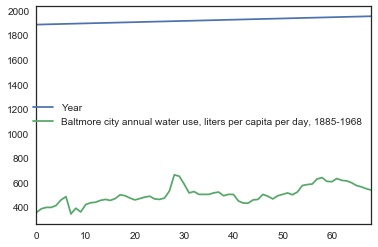

In [15]:
time_series = pd.read_csv('data/dataset.csv')
time_series.plot()
plt.show()